In [39]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(keras)

Get the output train

In [40]:
library(keras)

In [41]:
set_train_dir <- c('../input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/train')
set_test_dir <- c('../input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid')

**Read Images**

In [42]:

train_datagen <- image_data_generator(rescale = 1/255)


validation_datagen <- image_data_generator(rescale = 1/255)


train_generator <- flow_images_from_directory(
set_train_dir,
train_datagen,
target_size = c(128,128),
batch_size = 20,
class_mode = "binary"
)


validation_generator <- flow_images_from_directory(
set_test_dir,
validation_datagen,
target_size = c(128,128),
batch_size = 20,
class_mode = "binary"
)

**Display Batch**

In [43]:
batch <- generator_next(train_generator)
str(batch)

List of 2
 $ : num [1:20, 1:128, 1:128, 1:3] 0.1569 0.3529 0.4353 0.0784 0.5373 ...
 $ : num [1:20(1d)] 1 0 1 0 1 1 1 0 1 1 ...


**Keras Model**

In [44]:
model <- keras_model_sequential() %>%
layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = "relu",
input_shape = c(128, 128, 3)) %>%
layer_max_pooling_2d(pool_size = c(2, 2)) %>%
layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = "relu") %>%
layer_max_pooling_2d(pool_size = c(2, 2)) %>%
layer_conv_2d(filters = 128, kernel_size = c(3, 3), activation = "relu") %>%
layer_max_pooling_2d(pool_size = c(2, 2)) %>%
layer_conv_2d(filters = 256, kernel_size = c(3, 3), activation = "relu") %>%
layer_max_pooling_2d(pool_size = c(2, 2)) %>%
layer_flatten() %>%
layer_dropout(rate = 0.5) %>%
layer_dense(units = 512, activation = "relu") %>%
layer_dense(units = 256, activation = "relu") %>%
layer_dense(units = 1, activation = "sigmoid")

**Compile**

In [45]:
model %>% compile(
loss = "binary_crossentropy",
optimizer = optimizer_rmsprop(lr = 1e-4),
metrics = c("acc")
)

**Fit the model**

In [46]:
history <- model %>% fit_generator(
train_generator,
steps_per_epoch = 10,
epochs = 50,
validation_data = validation_generator,
validation_steps = 10
)

In [48]:
model %>% save_model_hdf5("cats_and_dogs_R.h5")

`geom_smooth()` using formula 'y ~ x'



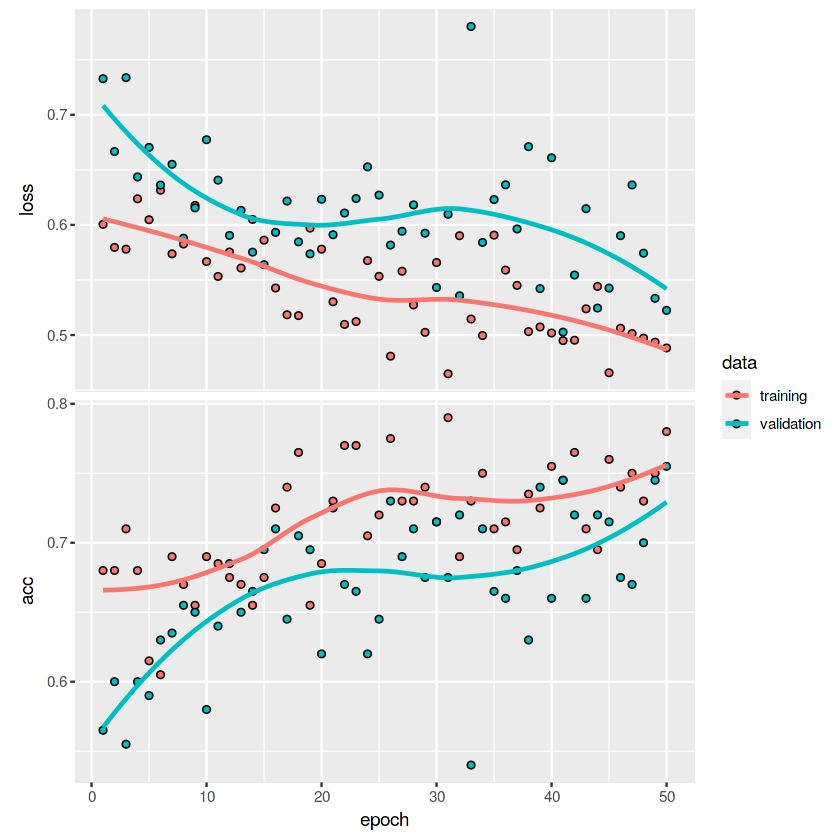

In [49]:
plot(history)

In [50]:
history


Final epoch (plot to see history):
    loss: 0.4883
     acc: 0.78
val_loss: 0.5224
 val_acc: 0.755 

**Prediction**

In [47]:
preds = evaluate_generator(model,
                          validation_generator,
                          steps = length(validation_generator))
preds

loss       acc 
0.7445757 0.4950000

In [ ]:
pred0s = evaluate_generator(model,
                          validation_generator,
                          steps = length(validation_generator))
pred0s